<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/forecasting_lag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Load the AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

In [45]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [46]:
#renaming the month -> date
df=df.rename(columns={'Month':'date'})
df.head()

,date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [47]:
#checking if date is in datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [49]:
#formatting the date
df['date']=pd.to_datetime(df['date'],format='%Y-%m')


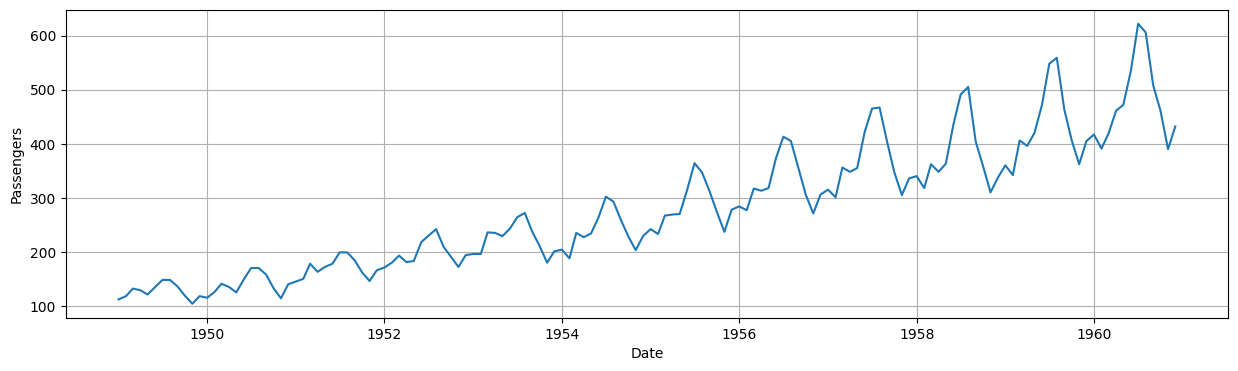

In [50]:
#check for trends
plt.figure(figsize=(15,4))
plt.plot(df['date'],df['Passengers'])
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [53]:
#lag
df['lag_1']=df['Passengers'].shift(1)
df['lag_12']=df['Passengers'].shift(12)


In [54]:
#after adding the lag, remove the null value rows
df.dropna(inplace=True)

In [56]:
# spliting data on the last 12 months as test data
train = df.iloc[:-12]
test = df.iloc[-12:]

X_train = train[['lag_1', 'lag_12']]
y_train = train['Passengers']

X_test = test[['lag_1', 'lag_12']]
y_test = test['Passengers']

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# training in a simple regression
model=LinearRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
mae = mean_absolute_error(y_test,pred)

print(f"RMSE : {rmse}, MAE : {mae}")

RMSE : 18.270638555853893, MAE : 15.666039348285414


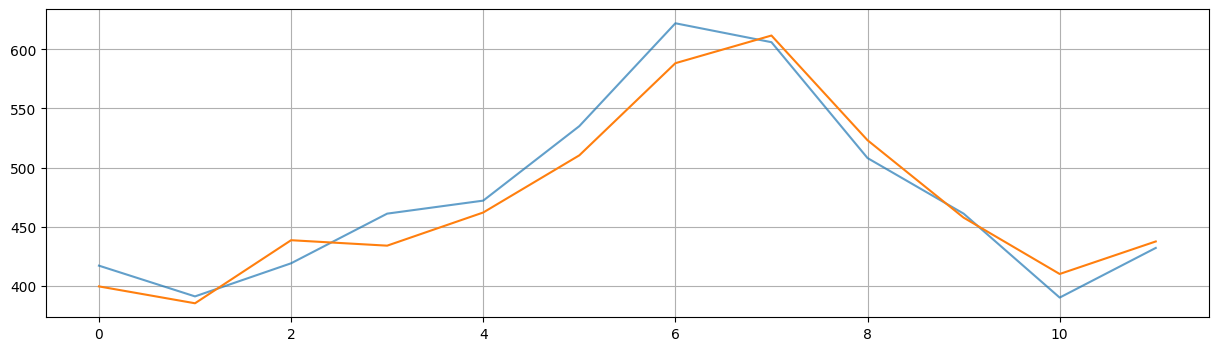

In [63]:
#evaluation plot
plt.figure(figsize=(15,4))
plt.plot(y_test.values,label='Actual',alpha=0.7)
plt.plot(pred,label='Predicted')
plt.grid(True)
plt.show()